In [100]:
from es_pandas import es_pandas
elastic_host = # ElasticSearch url
es_index = # # ElasticSearch index
ep = es_pandas(elastic_host)
df = ep.to_pandas(es_index)

100% (14582 of 14582) |##################| Elapsed Time: 0:00:05 Time:  0:00:05


In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import re

### Hours Graph


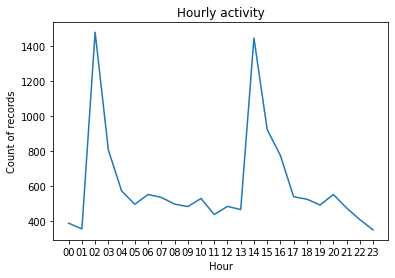

In [156]:
new_df = df.groupby('hour').count()
hours = [hour for hour, df in new_df.groupby('hour')]
plt.plot(hours, new_df['target'])
plt.title('Hourly activity')
plt.xlabel('Hour')
plt.ylabel('Count of records')
plt.show()

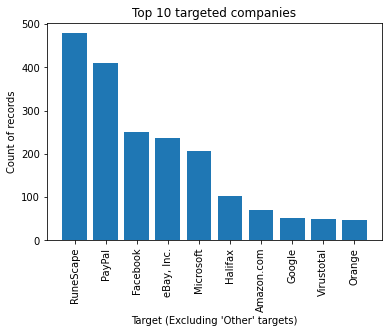

In [152]:
exclude_other = df['target'].isin(['Other'])
top_ten = df[~exclude_other]['target'].value_counts()[:10]
targets = top_ten.index.tolist()
values = top_ten.values
plt.bar(targets, values)
plt.title('Top 10 targeted companies')
plt.xticks(targets, rotation='vertical')
plt.xlabel('Target (Excluding \'Other\' targets)')
plt.ylabel('Count of records')
plt.show()

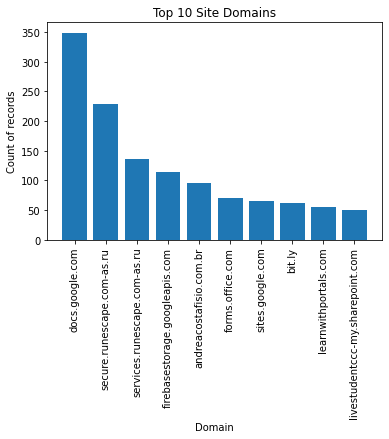

In [32]:
top_ten = df['domain'].value_counts()[:10]
domains = top_ten.index.tolist()
values = top_ten.values
plt.bar(domains, values)
plt.title('Top 10 site domains')
plt.xticks(domains, rotation='vertical')
plt.xlabel('Domain')
plt.ylabel('Count of records')
plt.show()

In [30]:
df['domain'] = df['url'].apply(lambda x: re.findall("http[s]?://(.*?)(?:$|/)", x)[0])

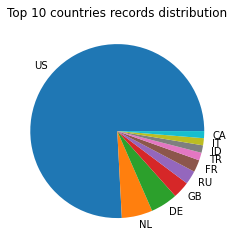

In [149]:
top_ten = df['country'].value_counts()[:10]
countries = top_ten.index.tolist()
values = top_ten.values

plt.pie(values, labels=countries)
plt.title('Top 10 countries records distribution')
plt.show()

In [142]:
top_ten = df.month.value_counts().sort_index(ascending=False)[:20]
top_ten

2020-10    2439
2020-09    2276
2020-08    1636
2020-07    1802
2020-06    1485
2020-05     891
2020-04     869
2020-03     531
2020-02     370
2020-01     220
2019-12     279
2019-11     218
2019-10     177
2019-09     102
2019-08     153
2019-07      66
2019-06      68
2019-05      51
2019-04      96
2019-03      51
Name: month, dtype: int64

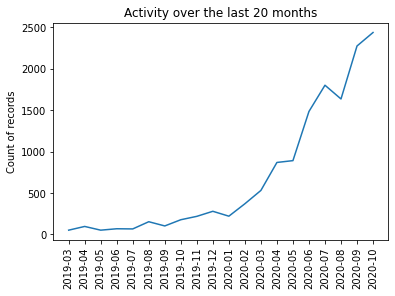

In [157]:
df.month.unique()
top_ten = df.month.value_counts().sort_index(ascending=False)[:20][::-1]
months = top_ten.index.tolist()
values = top_ten.values
plt.plot(months, values)
plt.xticks(months, rotation='vertical')
plt.title('Activity over the last 20 months')
plt.ylabel('Count of records')
plt.show()

In [161]:
df = df.rename(columns={'verification_time' : 'date'})
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].apply(lambda x: x.strftime("%Y-%m-%d"))

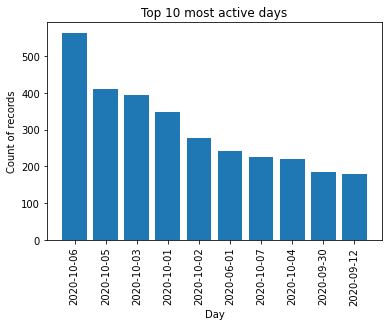

In [163]:
top_ten = df['date'].value_counts()[:10]
dates = top_ten.index.tolist()
values = top_ten.values
plt.bar(dates, values)
plt.title('Top 10 most active days')
plt.xticks(dates, rotation='vertical')
plt.xlabel('Day')
plt.ylabel('Count of records')
plt.show()